In [3]:
# Set up environment

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

from sklearn.model_selection import train_test_split # To split data
from sklearn.preprocessing import StandardScaler, MinMaxScaler # To scale data

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

### 1. Load the tips dataset

In [98]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [99]:
# Summarize the data

tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [100]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### a. Create a column named `tip_percentage`. This should be the tip amount divided by the total bill.

In [101]:
tips['tip_percentage'] = tips.tip / tips.total_bill
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### b. Create a column named `price_per_person`. This should be the total bill divided by the party size.

In [102]:
tips['price_per_person'] = tips.total_bill / tips['size']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,6.147500


**Takeaways**
1. Encode labels: `sex`, `smoker`, `day`, `time`.
2. Split the data into train, validate and test.
3. Scale the numeric variables in train, validate, and test. 

### Encode object columns

In [103]:
# Create df with obejct cols only

mask = (tips.dtypes == 'object').values
obj_tips = tips.iloc[:, mask]
obj_tips.head()

,sex,smoker,day,time
1,Female,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Male,No,Sun,Dinner
5,Female,No,Sun,Dinner


In [104]:
obj_tips.shape

(244, 4)

In [105]:
dummy_tips = pd.get_dummies(obj_tips, dummy_na=False, drop_first=True)
tips = pd.concat([tips, dummy_tips], axis=1)
tips.drop(columns=['sex', 'smoker', 'day', 'time'], inplace=True)
tips.head()

,total_bill,tip,size,tip_percentage,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,16.99,1.01,2,0.059447,8.495000,0,0,0,1,0,0
2,10.34,1.66,3,0.160542,3.446667,1,0,0,1,0,0
3,21.01,3.50,3,0.166587,7.003333,1,0,0,1,0,0
4,23.68,3.31,2,0.139780,11.840000,1,0,0,1,0,0
5,24.59,3.61,4,0.146808,6.147500,0,0,0,1,0,0


In [106]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   size              244 non-null    int64  
 3   tip_percentage    244 non-null    float64
 4   price_per_person  244 non-null    float64
 5   sex_Male          244 non-null    uint8  
 6   smoker_Yes        244 non-null    uint8  
 7   day_Sat           244 non-null    uint8  
 8   day_Sun           244 non-null    uint8  
 9   day_Thur          244 non-null    uint8  
 10  time_Lunch        244 non-null    uint8  
dtypes: float64(4), int64(1), uint8(6)
memory usage: 12.9 KB


### Split data into train, validate, and test

In [107]:
train_validate, test = train_test_split(tips, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
train.shape, validate.shape, test.shape

((136, 11), (59, 11), (49, 11))

### Scaling data by MinMaxScaler

In [108]:
import prepare

In [109]:
train.columns

Index(['total_bill', 'tip', 'size', 'tip_percentage', 'price_per_person',
       'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Lunch'],
      dtype='object')

In [110]:
numeric = ['total_bill', 'size', 'price_per_person']

train, validate, test = prepare.scale_telco(train, validate, test, numeric)
train.head()

,total_bill,tip,size,tip_percentage,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_scaled,size_scaled,price_per_person_scaled
19,16.97,3.50,3,0.206246,5.656667,0,0,0,1,0,0,0.307114,0.4,0.150344
173,7.25,5.15,2,0.710345,3.625000,1,1,0,1,0,0,0.092355,0.2,0.032258
119,12.43,1.80,2,0.144811,6.215000,0,0,0,0,1,1,0.206805,0.2,0.182796
29,21.70,4.30,2,0.198157,10.850000,1,0,1,0,0,0,0.411622,0.2,0.452194
238,32.83,1.17,2,0.035638,16.415000,1,1,1,0,0,0,0.657534,0.2,0.775647


### c. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?
- We have two related target variables to discuss: `tip` and `tip percentage`

In [111]:
import explore

In [112]:
train.dtypes

total_bill                 float64
tip                        float64
size                         int64
tip_percentage             float64
price_per_person           float64
sex_Male                     uint8
smoker_Yes                   uint8
day_Sat                      uint8
day_Sun                      uint8
day_Thur                     uint8
time_Lunch                   uint8
total_bill_scaled          float64
size_scaled                float64
price_per_person_scaled    float64
dtype: object

In [113]:
train.nunique()

total_bill                 132
tip                         82
size                         6
tip_percentage             136
price_per_person           133
sex_Male                     2
smoker_Yes                   2
day_Sat                      2
day_Sun                      2
day_Thur                     2
time_Lunch                   2
total_bill_scaled          132
size_scaled                  6
price_per_person_scaled    133
dtype: int64

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 19 to 167
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_bill               136 non-null    float64
 1   tip                      136 non-null    float64
 2   size                     136 non-null    int64  
 3   tip_percentage           136 non-null    float64
 4   price_per_person         136 non-null    float64
 5   sex_Male                 136 non-null    uint8  
 6   smoker_Yes               136 non-null    uint8  
 7   day_Sat                  136 non-null    uint8  
 8   day_Sun                  136 non-null    uint8  
 9   day_Thur                 136 non-null    uint8  
 10  time_Lunch               136 non-null    uint8  
 11  total_bill_scaled        136 non-null    float64
 12  size_scaled              136 non-null    float64
 13  price_per_person_scaled  136 non-null    float64
dtypes: float64(7), int64(1), 

In [115]:
train.columns

Index(['total_bill', 'tip', 'size', 'tip_percentage', 'price_per_person',
       'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Lunch', 'total_bill_scaled', 'size_scaled',
       'price_per_person_scaled'],
      dtype='object')

In [116]:
# Assign all the variables into categorical and numeric

categorical = ['sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur','time_Lunch']
numeric = ['total_bill_scaled', 'size_scaled','price_per_person_scaled']

In [125]:
# Create two dataframes for the two target variables with numeric features only

df_train_tip_numeric = train[['tip'] + numeric]
df_train_tip_percentage_numeric = train[['tip_percentage'] + numeric]

In [126]:
df_train_tip_numeric.head()

,tip,total_bill_scaled,size_scaled,price_per_person_scaled
19,3.50,0.307114,0.4,0.150344
173,5.15,0.092355,0.2,0.032258
119,1.80,0.206805,0.2,0.182796
29,4.30,0.411622,0.2,0.452194
238,1.17,0.657534,0.2,0.775647


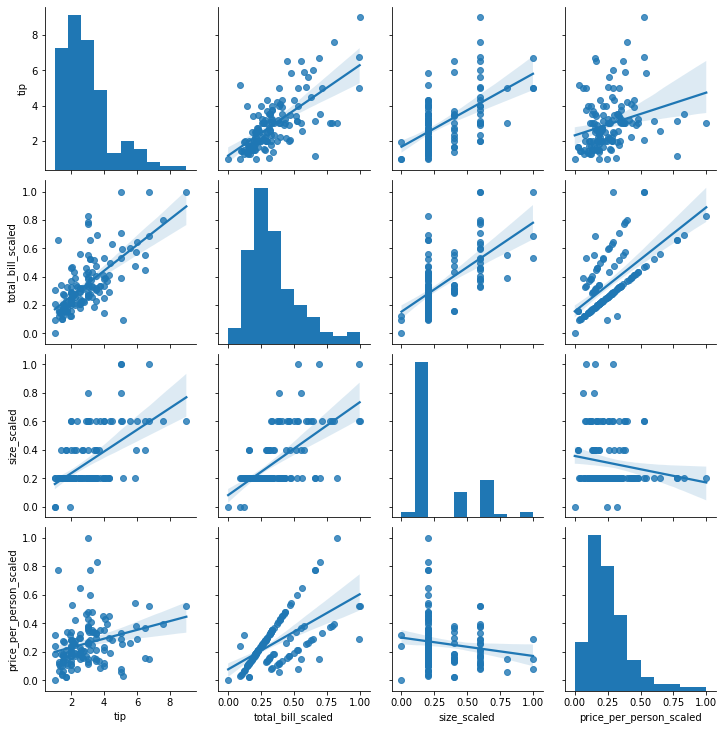

In [127]:
explore.plot_variable_pairs(df_train_tip_numeric)

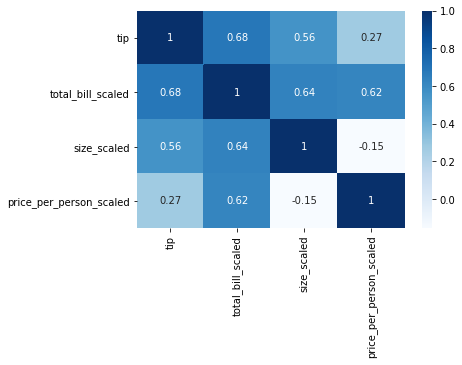

In [128]:
explore.corr_heatmap(df_train_tip_numeric)

**Takeaways**
- I think among numeric features, `total_bill` and `size` are most important for predicting the `tip` amount.

In [129]:
df_train_tip_percentage_numeric.head()

,tip_percentage,total_bill_scaled,size_scaled,price_per_person_scaled
19,0.206246,0.307114,0.4,0.150344
173,0.710345,0.092355,0.2,0.032258
119,0.144811,0.206805,0.2,0.182796
29,0.198157,0.411622,0.2,0.452194
238,0.035638,0.657534,0.2,0.775647


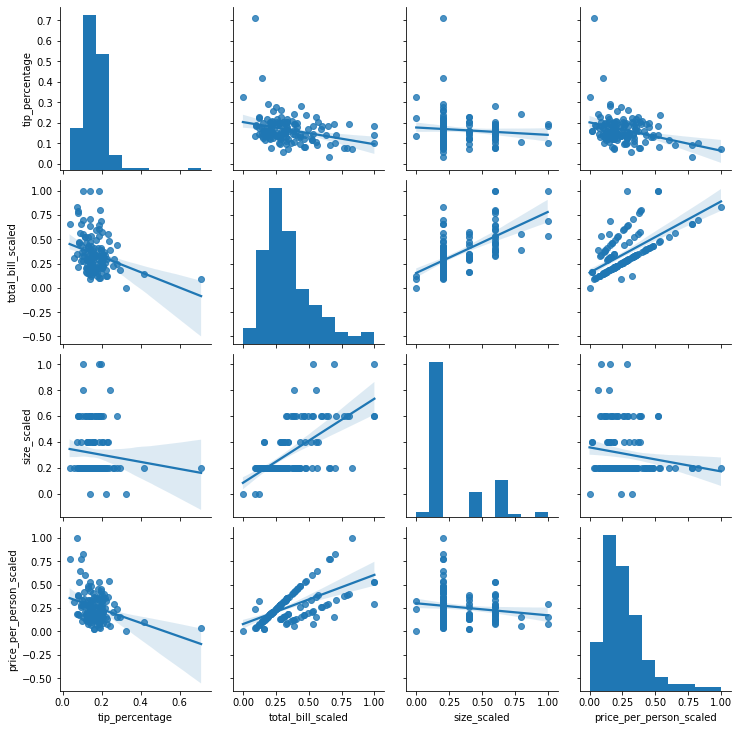

In [130]:
explore.plot_variable_pairs(df_train_tip_percentage_numeric)

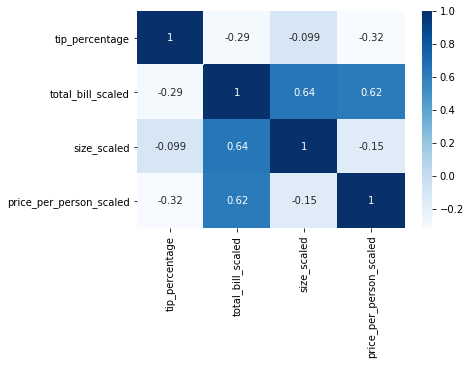

In [131]:
explore.corr_heatmap(df_train_tip_percentage_numeric)

**Takeaways**
- I think among numeric features, `total_bill` and `price_per_person` are most important for predicting the `tip_percentage`.

### d. Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?

#### KBest

In [132]:
df_train_tip_numeric.head()

,tip,total_bill_scaled,size_scaled,price_per_person_scaled
19,3.50,0.307114,0.4,0.150344
173,5.15,0.092355,0.2,0.032258
119,1.80,0.206805,0.2,0.182796
29,4.30,0.411622,0.2,0.452194
238,1.17,0.657534,0.2,0.775647


In [133]:
df_train_tip_numeric.columns

Index(['tip', 'total_bill_scaled', 'size_scaled', 'price_per_person_scaled'], dtype='object')

In [134]:
X_train_tip_numeric = df_train_tip_numeric[['total_bill_scaled', 'size_scaled', 'price_per_person_scaled']]
y_train_tip_numeric = df_train_tip_numeric[['tip']]

In [136]:
f_selector = SelectKBest(f_regression, k=2)
f_selector

SelectKBest(k=2, score_func=<function f_regression at 0x7f8e1a8b57a0>)

In [137]:
f_selector = f_selector.fit(X_train_tip_numeric, y_train_tip_numeric)
f_selector

SelectKBest(k=2, score_func=<function f_regression at 0x7f8e1a8b57a0>)

In [140]:
X_train_tip_numeric_reduced = f_selector.transform(X_train_tip_numeric)
X_train_tip_numeric_reduced.shape

(136, 2)

In [141]:
f_support = f_selector.get_support()
f_support

array([ True,  True, False])

In [142]:
f_feature = X_train_tip_numeric.iloc[:, f_support].columns.tolist()
f_feature

['total_bill_scaled', 'size_scaled']

In [143]:
X_train_tip_numeric_reduced = X_train_tip_numeric.iloc[:, f_support]
X_train_tip_numeric_reduced.head()

,total_bill_scaled,size_scaled
19,0.307114,0.4
173,0.092355,0.2
119,0.206805,0.2
29,0.411622,0.2
238,0.657534,0.2


#### Recursive Feature Elimination: RFE

In [145]:
lm = LinearRegression()

In [146]:
rfe = RFE(lm, 2)

In [147]:
X_train_tip_numeric.head()

,total_bill_scaled,size_scaled,price_per_person_scaled
19,0.307114,0.4,0.150344
173,0.092355,0.2,0.032258
119,0.206805,0.2,0.182796
29,0.411622,0.2,0.452194
238,0.657534,0.2,0.775647


In [148]:
X_rfe = rfe.fit_transform(X_train_tip_numeric, y_train_tip_numeric)

In [149]:
mask = rfe.support_
mask

array([ True, False,  True])

In [150]:
X_train_tip_numeric_rfe = X_train_tip_numeric.iloc[:, mask]
X_train_tip_numeric_rfe.head()

,total_bill_scaled,price_per_person_scaled
19,0.307114,0.150344
173,0.092355,0.032258
119,0.206805,0.182796
29,0.411622,0.452194
238,0.657534,0.775647


In [151]:
X_train_tip_numeric_rfe.columns.tolist()

['total_bill_scaled', 'price_per_person_scaled']

### e. Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?
#### KBest

In [152]:
df_train_tip_percentage_numeric.head()

,tip_percentage,total_bill_scaled,size_scaled,price_per_person_scaled
19,0.206246,0.307114,0.4,0.150344
173,0.710345,0.092355,0.2,0.032258
119,0.144811,0.206805,0.2,0.182796
29,0.198157,0.411622,0.2,0.452194
238,0.035638,0.657534,0.2,0.775647


In [154]:
X_train_tip_percentage_numeric = df_train_tip_percentage_numeric[['total_bill_scaled', 'size_scaled', 'price_per_person_scaled']]
y_train_tip_percentage_numeric = df_train_tip_percentage_numeric[['tip_percentage']]

In [155]:
f_selector = SelectKBest(f_regression, k=2)
f_selector

SelectKBest(k=2, score_func=<function f_regression at 0x7f8e1a8b57a0>)

In [156]:
f_selector = f_selector.fit(X_train_tip_percentage_numeric, y_train_tip_percentage_numeric)
f_selector

SelectKBest(k=2, score_func=<function f_regression at 0x7f8e1a8b57a0>)

In [157]:
X_train_tip_percentage_numeric_reduced = f_selector.transform(X_train_tip_percentage_numeric)
X_train_tip_percentage_numeric_reduced.shape

(136, 2)

In [158]:
f_support = f_selector.get_support()
f_support

array([ True, False,  True])

In [159]:
X_train_tip_percentage_numeric_reduced = X_train_tip_percentage_numeric.iloc[:, f_support]
X_train_tip_percentage_numeric_reduced.head()

,total_bill_scaled,price_per_person_scaled
19,0.307114,0.150344
173,0.092355,0.032258
119,0.206805,0.182796
29,0.411622,0.452194
238,0.657534,0.775647


In [160]:
X_train_tip_percentage_numeric_reduced.columns

Index(['total_bill_scaled', 'price_per_person_scaled'], dtype='object')

#### Recursive Feature Elimination: RFE

In [161]:
lm = LinearRegression()
rfe = RFE(lm, 2)

In [162]:
X_train_tip_percentage_numeric.head()

,total_bill_scaled,size_scaled,price_per_person_scaled
19,0.307114,0.4,0.150344
173,0.092355,0.2,0.032258
119,0.206805,0.2,0.182796
29,0.411622,0.2,0.452194
238,0.657534,0.2,0.775647


In [164]:
y_train_tip_percentage_numeric.head()

,tip_percentage
19,0.206246
173,0.710345
119,0.144811
29,0.198157
238,0.035638


In [165]:
X_rfe = rfe.fit_transform(X_train_tip_percentage_numeric, y_train_tip_percentage_numeric)

In [166]:
mask = rfe.support_
mask

array([False,  True,  True])

In [167]:
X_train_tip_percentage_numeric_rfe = X_train_tip_percentage_numeric.iloc[:, mask]
X_train_tip_percentage_numeric_rfe.head()

,size_scaled,price_per_person_scaled
19,0.4,0.150344
173,0.2,0.032258
119,0.2,0.182796
29,0.2,0.452194
238,0.2,0.775647


In [168]:
X_train_tip_percentage_numeric_rfe.columns.tolist()

['size_scaled', 'price_per_person_scaled']

### f. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?

### 2. Write a function named `select_kbest` that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [174]:
def select_kbest(X, y, n):
    """
    Returns the top n selected features based on the SelectKBest calss
    Parameters: predictors(X) in df, target(y) in df, the number of features to select(n)
    """
    f_selector = SelectKBest(f_regression, k=n)
    f_selector = f_selector.fit(X, y)
    f_support = f_selector.get_support()
    f_feature = X.iloc[:, f_support].columns.tolist()
    return f_feature

In [176]:
# Test

X_train_tip_numeric.head()

(     total_bill_scaled  size_scaled  price_per_person_scaled
 19            0.307114          0.4                 0.150344
 173           0.092355          0.2                 0.032258
 119           0.206805          0.2                 0.182796
 29            0.411622          0.2                 0.452194
 238           0.657534          0.2                 0.775647,
       tip
 19   3.50
 173  5.15
 119  1.80
 29   4.30
 238  1.17)

In [172]:
y_train_tip_numeric.head()

,tip
19,3.50
173,5.15
119,1.80
29,4.30
238,1.17


In [175]:
select_kbest(X_train_tip_numeric, y_train_tip_numeric, 2)

['total_bill_scaled', 'size_scaled']

In [177]:
select_kbest(X_train_tip_percentage_numeric, y_train_tip_percentage_numeric, 2)

['total_bill_scaled', 'price_per_person_scaled']

### 3. Write a function named `rfe` that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the `RFE` class. Test your function with the `tips` dataset. You should see the same results as when you did the process manually.

In [178]:
def rfe(X, y, n):
    """
    Returns the top n selected features based on the RFE calss
    Parameters: predictors(X) in df, target(y) in df, the number of features to select(n)
    """
    lm = LinearRegression()
    rfe = RFE(lm, n)
    rfe = rfe.fit(X, y)
    rfe_support = rfe.support_
    f_feature = X.iloc[:, rfe_support].columns.tolist()
    return f_feature

In [179]:
rfe(X_train_tip_numeric, y_train_tip_numeric, 2)

['total_bill_scaled', 'price_per_person_scaled']

In [180]:
rfe(X_train_tip_percentage_numeric, y_train_tip_percentage_numeric, 2)

['size_scaled', 'price_per_person_scaled']